In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
  
# X_train.shape  =(50000, 32, 32, 3)
# X_test.shape  = (10000, 32, 32, 3)

(10000, 32, 32, 3)

In [20]:
#y array is a rwo dimentional array therefore have to flattern it
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [21]:
#X_train[0] gives a array of 32*32 * 3(RGB colours)
category =["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
def plot_sample(X,y,index):
    plt.figure(figsize =(15,2))
    plt.imshow(X[index])
    plt.xlabel(category[y[index]])

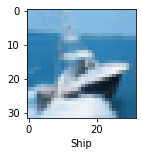

In [22]:
plot_sample(X_train,y_train,8)

In [23]:
# scalling the image to 0-1 by dividing it from max value(255)
X_train = X_train / 255
X_test = X_test / 255

In [31]:
cnn = models.Sequential([
    #cnn layer
    layers.Conv2D(filters=32, kernel_size=(3,3), activation ="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation ="relu"),
    layers.MaxPooling2D((2,2)),
    
    #dense Layers
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation ="softmax")
])

In [32]:
cnn.compile(
    optimizer="adam",
    loss= "sparse_categorical_crossentropy",
    metrics= ["accuracy"]
)

In [33]:
cnn.fit(X_train,y_train, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4441 - accuracy: 0.4840
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0890 - accuracy: 0.6216
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9587 - accuracy: 0.6662
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8678 - accuracy: 0.6996
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8005 - accuracy: 0.7232
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7434 - accuracy: 0.7421
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6928 - accuracy: 0.7600
Epoch 8/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6468 - accuracy: 0.7760
Epoch 9/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5990 - accuracy: 0.7901
Epoch 10/10
1563/1563 [==============================] - 28s 18m

In [34]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9382 - accuracy: 0.6965


[0.938188374042511, 0.6965000033378601]

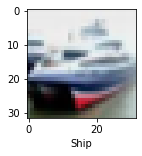

In [35]:
plot_sample(X_test,y_test,1)

In [36]:
y_predict = cnn.predict(X_test)
y_predict

array([[7.92780484e-05, 4.77588947e-05, 2.32085562e-03, ...,
        8.33029117e-05, 9.81248356e-03, 2.11210613e-06],
       [4.65425663e-04, 3.51651898e-03, 1.25949930e-06, ...,
        2.19807475e-06, 9.95875895e-01, 1.27569321e-04],
       [1.66736096e-01, 4.66315120e-01, 7.25952582e-03, ...,
        2.24571372e-03, 2.29461998e-01, 1.13013953e-01],
       ...,
       [3.72384147e-06, 6.17085449e-09, 3.42347354e-01, ...,
        1.96043760e-01, 8.47230476e-05, 1.07450405e-05],
       [6.35265410e-01, 1.80310681e-01, 7.32704205e-03, ...,
        9.57522483e-04, 4.62683762e-04, 1.60994579e-03],
       [1.99663006e-07, 7.16904154e-08, 1.69753948e-05, ...,
        9.98490453e-01, 2.65257345e-08, 2.78604773e-07]], dtype=float32)

In [38]:
# np.argmax give the index of the maximum no
y_classes = [np.argmax(element) for element in y_predict]
y_classes[:10]

[3, 8, 1, 0, 6, 6, 1, 6, 3, 1]

In [40]:
#compare above array with following array
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

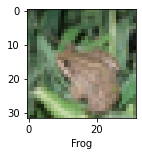

In [49]:
plot_sample(X_test,y_test,4)

In [50]:
category[y_classes[4]]

'Frog'

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1000
           1       0.89      0.76      0.82      1000
           2       0.61      0.59      0.60      1000
           3       0.56      0.48      0.51      1000
           4       0.60      0.67      0.63      1000
           5       0.61      0.57      0.59      1000
           6       0.75      0.79      0.77      1000
           7       0.65      0.79      0.71      1000
           8       0.82      0.80      0.81      1000
           9       0.81      0.76      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

